# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
223                           NaN          United Kingdom  55.378100   
224                           NaN                 Uruguay -32.522800   
225                           NaN           United States  37.090200   
226                           NaN              Uzbekistan  41.377500   
227                           NaN               Venezuela   6.423800   
228                           NaN                 Vietnam  16.000000   
229                           NaN                  Zambia -15.416700   
230                           NaN                Zimbabwe -20.000000   
231              Diamond Princess                  Canada   0.000000   
232                           NaN                Dominica  15.415000   
233                           NaN                 Grenada  12.116500   
234                           NaN              Mozambique -18.665695   
235                           NaN                   Syria  34.802075   
236                           NaN             Timor-Leste  -8.874217   
237                           NaN                  Belize  13.193900   
238                     Recovered                  Canada   0.000000   
239                           NaN                    Laos  19.856270   
240                           NaN                   Libya  26.335100   
241                           NaN      West Bank and Gaza  31.952200   
242                           NaN           Guinea-Bissau  11.803700   
243                           NaN                    Mali  17.570692   
244                           NaN   Saint Kitts and Nevis  17.357822   
245         Northwest Territories                  Canada  64.825500   
246                         Yukon                  Canada  

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
223                           NaN          United Kingdom  55.378100   
224                           NaN                 Uruguay -32.522800   
225                           NaN           United States  37.090200   
226                           NaN              Uzbekistan  41.377500   
227                           NaN               Venezuela   6.423800   
228                           NaN                 Vietnam  16.000000   
229                           NaN                  Zambia -15.416700   
230                           NaN                Zimbabwe -20.000000   
231              Diamond Princess                  Canada   0.000000   
232                           NaN                Dominica  15.415000   
233                           NaN                 Grenada  12.116500   
234                           NaN              Mozambique -18.665695   
235                           NaN                   Syria  34.802075   
236                           NaN             Timor-Leste  -8.874217   
237                           NaN                  Belize  13.193900   
238                     Recovered                  Canada   0.000000   
239                           NaN                    Laos  19.856270   
240                           NaN                   Libya  26.335100   
241                           NaN      West Bank and Gaza  31.952200   
242                           NaN           Guinea-Bissau  11.803700   
243                           NaN                    Mali  17.570692   
244                           NaN   Saint Kitts and Nevis  17.357822   
245         Northwest Territories                  Canada  64.825500   
246                         Yukon                  Canada  

In [5]:
# merge region death
death.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Norway  60.4720    8.4689        0        0   
176            NaN              Oman  21.0000   57.0000        0        0   
177            NaN          Pakistan  30.3753   69.3451        0        0   
178            NaN            Panama   8.5380  -80.7821        0        0   
179            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
180            NaN          Paraguay -23.4425  -58.4438        0        0   
181            NaN              Peru  -9.1900  -75.0152        0        0   
182            NaN       Philippines  13.0000  122.0000        0        0   
183            NaN            Poland  51.9194   19.1451        0        0   
184            NaN          Portugal  39.3999   -8.2245        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/21/20  3/22/20  3/23/20  \
175        0        0        0        0  ...        7        7       10   
176        0        0        0        0  ...        0        0        0   
177        0        0        0        0  ...        3        5        6   
178        0        0        0        0  ...        1        3        6   
179        0        0        0        0  ...        0        0        0   
180        0        0        0        0  ...        1        1        1   
181        0        0        0        0  ...        5        5        5   
182        0        0        0        0  ...       19       25       33   
183        0        0        0        0  ...        5        7        8   
184        0        0        0        0  ...       12       14       23   

     3/24/20  3/25/20  3/26/20  3/27/20  3/28/20   Population   \
175       12       14       14       19       23     5,357,000   
176        0        0        0        0        0     4,636,000   
177        7        8        9       11       12   197,000,000   
178        6        8        8        9       14           NaN   
179        0        0        0        0        0           NaN   
180        2        3        3        3        3           NaN   
181        7        9        9       11       16           NaN   
182       35       38       45       54       68   104,900,000   
183       10       14       16       16       18    37,980,000   
184       33       43       60       76      100    10,290,000   

                   region  
175            Norway_nan  
176              Oman_nan  
177          Pakistan_nan  
178            Panama_nan  
179  Papua New Guinea_nan  
180          Paraguay_nan  
181              Peru_nan  
182       Philippines_nan  
183            Poland_nan  
184          Portugal_nan  

[10 rows x 73 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Panama   8.5380  -80.7821        0        0   
176            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
177            NaN          Paraguay -23.4425  -58.4438        0        0   
178            NaN              Peru  -9.1900  -75.0152        0        0   
179            NaN       Philippines  13.0000  122.0000        0        0   
180            NaN            Poland  51.9194   19.1451        0        0   
181            NaN          Portugal  39.3999   -8.2245        0        0   
182            NaN             Qatar  25.3548   51.1839        0        0   
183            NaN           Romania  45.9432   24.9668        0        0   
184            NaN            Russia  60.0000   90.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/21/20  3/22/20  3/23/20  \
175        0        0        0        0  ...        0        0        0   
176        0        0        0        0  ...        0        0        0   
177        0        0        0        0  ...        0        0        0   
178        0        0        0        0  ...        1        1        1   
179        0        0        0        0  ...       13       17       17   
180        0        0        0        0  ...        1        1        1   
181        0        0        0        0  ...        5        5        5   
182        0        0        0        0  ...       27       33       33   
183        0        0        0        0  ...       52       64       64   
184        0        0        0        0  ...       12       16       16   

     3/24/20  3/25/20  3/26/20  3/27/20  3/28/20   Population   \
175        1        1        2        2        2           NaN   
176        0        0        0        0        0           NaN   
177        0        0        0        1        1           NaN   
178        1        1       14       16       16           NaN   
179       20       26       28       31       35   104,900,000   
180        1        7        7        7        7    37,980,000   
181       22       22       43       43       43    10,290,000   
182       41       41       43       43       45           NaN   
183       79       86       94      115      139    19,530,000   
184       22       29       38       45       49   144,500,000   

                   region  
175            Panama_nan  
176  Papua New Guinea_nan  
177          Paraguay_nan  
178              Peru_nan  
179       Philippines_nan  
180            Poland_nan  
181          Portugal_nan  
182             Qatar_nan  
183           Romania_nan  
184            Russia_nan  

[10 rows x 73 columns]

In [7]:
confirmed.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Norway  60.4720    8.4689        0        0   
176            NaN              Oman  21.0000   57.0000        0        0   
177            NaN          Pakistan  30.3753   69.3451        0        0   
178            NaN            Panama   8.5380  -80.7821        0        0   
179            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
180            NaN          Paraguay -23.4425  -58.4438        0        0   
181            NaN              Peru  -9.1900  -75.0152        0        0   
182            NaN       Philippines  13.0000  122.0000        0        0   
183            NaN            Poland  51.9194   19.1451        0        0   
184            NaN          Portugal  39.3999   -8.2245        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/21/20  3/22/20  3/23/20  \
175        0        0        0        0  ...     2118     2385     2621   
176        0        0        0        0  ...       52       55       66   
177        0        0        0        0  ...      730      776      875   
178        0        0        0        0  ...      200      313      345   
179        0        0        0        0  ...        1        1        1   
180        0        0        0        0  ...       18       22       22   
181        0        0        0        0  ...      318      363      395   
182        0        0        0        0  ...      307      380      462   
183        0        0        0        0  ...      536      634      749   
184        0        0        0        0  ...     1280     1600     2060   

     3/24/20  3/25/20  3/26/20  3/27/20  3/28/20   Population   \
175     2863     3084     3369     3755     4015     5,357,000   
176       84       99      109      131      152     4,636,000   
177      972     1063     1201     1373     1495   197,000,000   
178      345      443      558      674      786           NaN   
179        1        1        1        1        1           NaN   
180       27       37       41       52       56           NaN   
181      416      480      580      635      671           NaN   
182      552      636      707      803     1075   104,900,000   
183      901     1051     1221     1389     1638    37,980,000   
184     2362     2995     3544     4268     5170    10,290,000   

                   region  
175            Norway_nan  
176              Oman_nan  
177          Pakistan_nan  
178            Panama_nan  
179  Papua New Guinea_nan  
180          Paraguay_nan  
181              Peru_nan  
182       Philippines_nan  
183            Poland_nan  
184          Portugal_nan  

[10 rows x 73 columns]

## Create Time Series + Plots

In [8]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [9]:

## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute

ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major 2nd Areas')

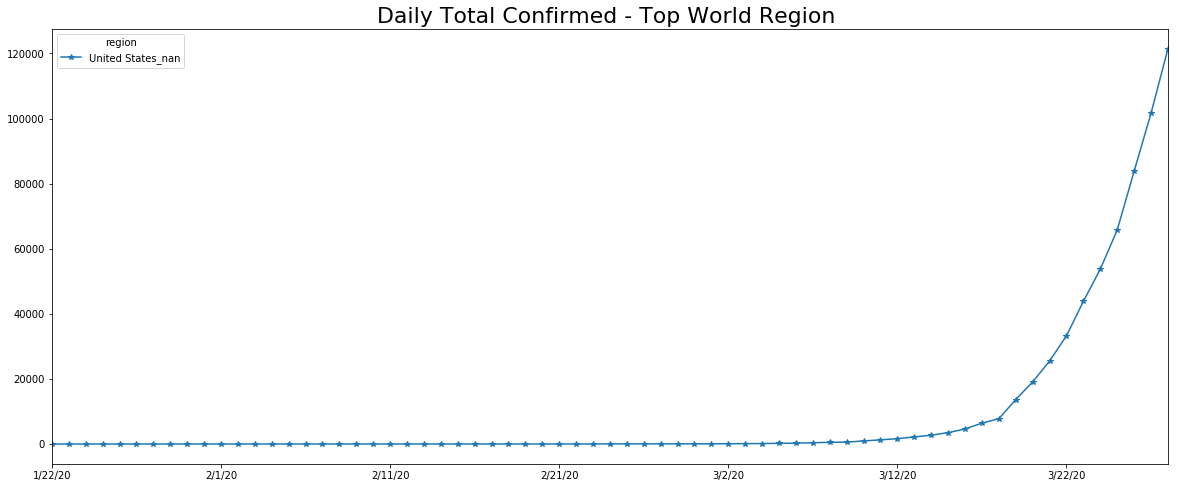

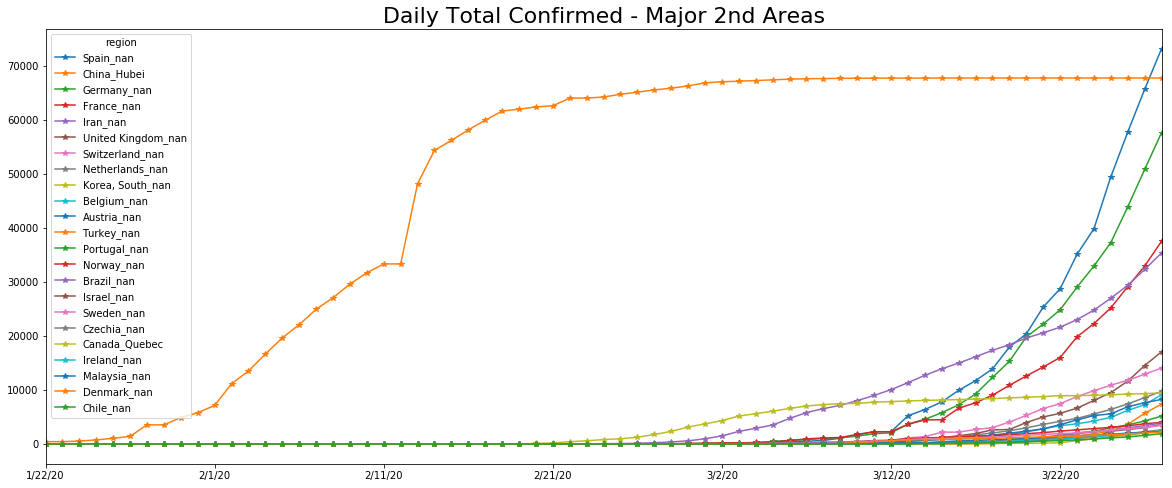

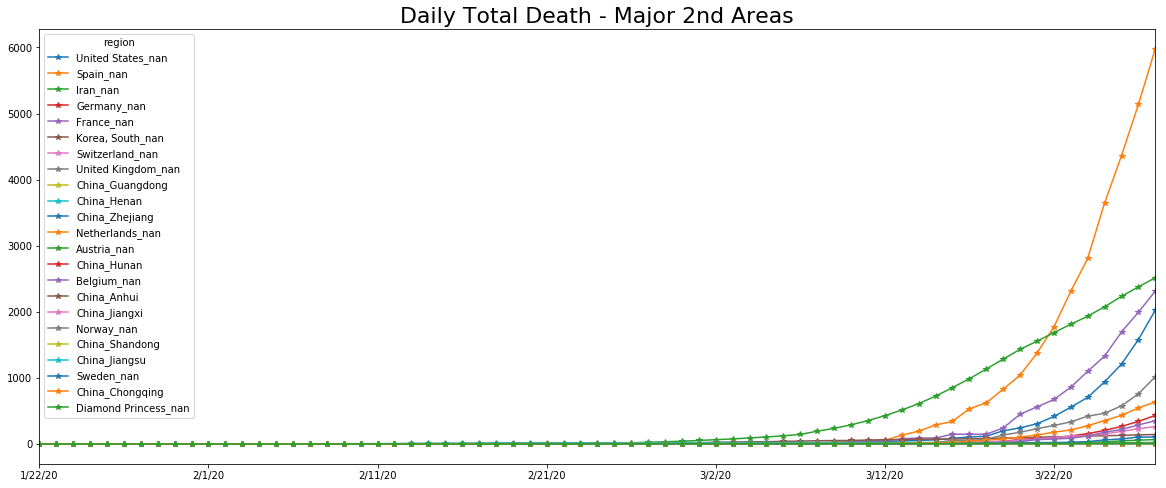

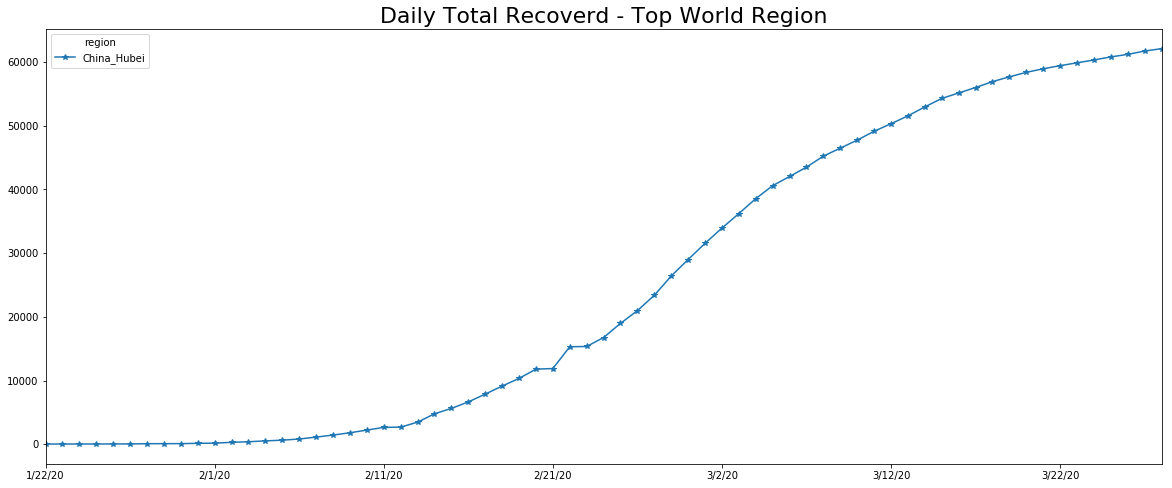

In [11]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Confirmed - Top World Region ',fontdict={'fontsize': 22})
p.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Confirmed - Major 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Death - Top World Region',fontdict={'fontsize': 22})
p_d.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Death - Major 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Recoverd - Top World Region',fontdict={'fontsize': 22})
p_r.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Recoverd - Major 2nd Areas',fontdict={'fontsize': 22})

## Kalman Filter With R

In [12]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'/home/notebookuser/notebooks/covid19/korean/ts_r.csv')

In [13]:
#!pip install rpy2


In [14]:
import rpy2
%load_ext rpy2.ipython

In [15]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [16]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [17]:
%%R
require(pracma)
require(Metrics)
require(readr)
Sys.setenv(TZ='GMT')
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_2_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [18]:
p=%R pred_all

In [19]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

### Extract Weather Data

In [20]:
#!pip install pyweatherbit


In [21]:

#from weatherbit.api import Api
#import json  
#import pandas as pd  
#from pandas.io.json import json_normalize 

#api_key = "26141d374d8e49d0a2e1f1254428ce8e"
#api_key ="f206579c74644c4b96a2423cb56a1687"
# #api_key ="81a581ac823849f38427fb5081cb8df8"
# #api_key ="be7aaf4ff7184347aa1ebc2a2db514fe"

#api = Api(api_key)
#api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.
#api.get_forecast(lat='Lat', lon='Lon')

###Weather History

In [22]:

# ################## already done since API is limited to 500 call per day

# w=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (61,len(confirmed)):
#   start_date=pd.to_datetime('2020-01-22')
#   for j in range (4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     # j=json_normalize(j)
#     # j=j['data']
#     # max_temp=json_normalize(j['data'])['max_temp'].values[0] # max
#     # min_temp=json_normalize(j['data'])['min_temp'].values[0]
#     try:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [23]:

# ################## Update Recent Day Weather

# w_update=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (28,len(confirmed)):
#   start_date=pd.to_datetime('2020-02-17')
#   for j in range (confirmed.shape[1]-4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     try:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [24]:

# w_update.to_csv(r'w_update.csv')

### Extract Weather Forecast Data

In [25]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

In [26]:
w=pd.read_csv('/home/notebookuser/notebooks/covid19/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Build Train Set Data Structure

In [27]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [28]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
### Joao - Fix NaN Kalman_Filter
#t['kalman_prediction']=round(t['kalman_prediction'])
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'],2)
#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  


## Kalman 1 day Prediction with Evaluation

In [29]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
68  China_Hubei  2.985775e+09  54642.241148  48260.38806


            region          mse        rmse        mae
80  China_Shanghai  98898.80597  314.481805  293.19403


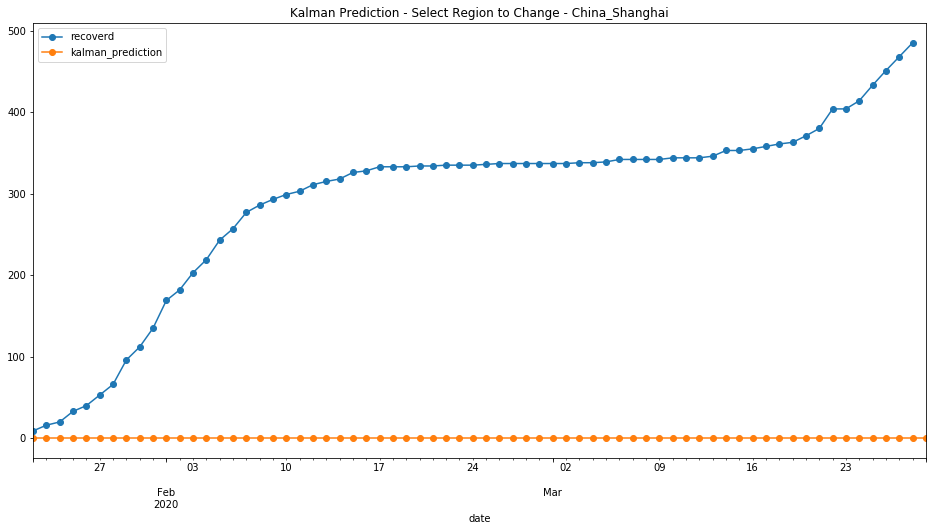

In [30]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Shanghai'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
146  Italy_nan  7.801076e+08  27930.406338  13520.432836


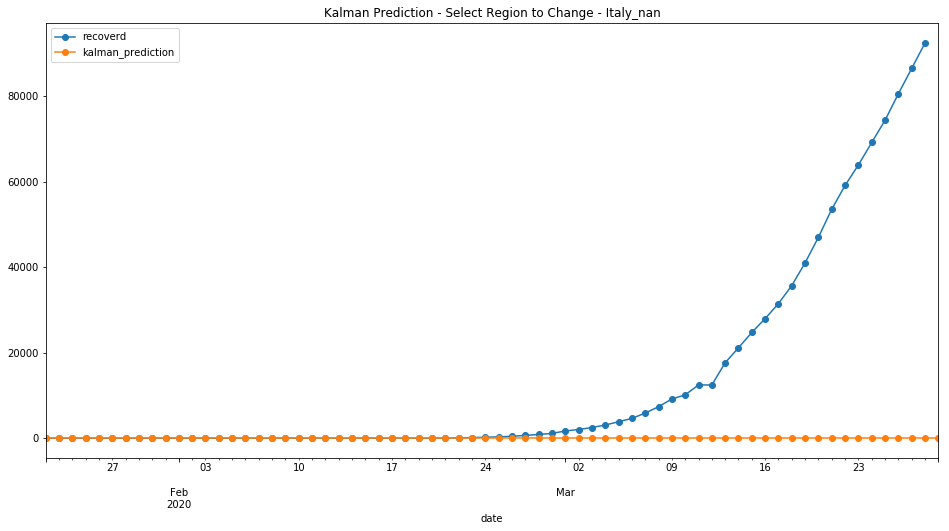

In [31]:
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

In [32]:
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse         rmse          mae
245  United States_nan  6.525320e+08  25544.70558  8897.044776


                 region           mse         rmse          mae
244  United Kingdom_nan  1.399147e+07  3740.516745  1446.925373


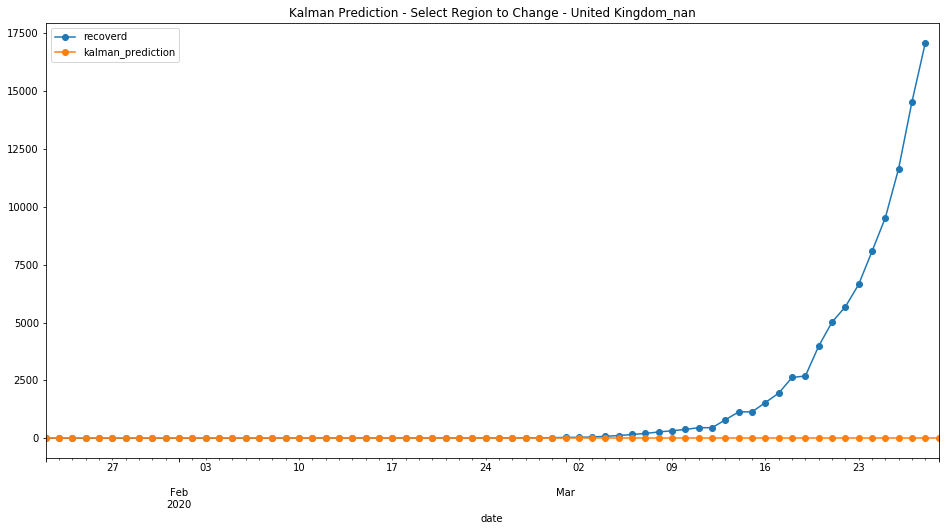

In [33]:
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [34]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='7G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvjtupdv_
  JVM stdout: /tmp/tmpvjtupdv_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvjtupdv_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 2 days !!!
H2O cluster name:           H2O_from_python_unknownUser_jednxp
H2O cluster total nodes:    1
H2O cluster free memory:    7 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [35]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training in Italy progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-18']
boots=train_df[train_df['date']>='2020-03-25'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-03-18']]*1000,ignore_index=True)

### Train in Spain progression of the Virus
train_df_v2=train_df[train_df['region']=='Spain_nan']
test=train[train['date']>='2020-03-21']
test=test[test['date']<'2020-03-29']

In [36]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
          ]

In [37]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
pred2.iloc[:55]

0  confirmed       date                   region
0    42.0         24 2020-03-21          Afghanistan_nan
1    40.0         40 2020-03-22          Afghanistan_nan
2    62.0         40 2020-03-23          Afghanistan_nan
3    58.0         74 2020-03-24          Afghanistan_nan
4   106.0         84 2020-03-25          Afghanistan_nan
5   111.0         94 2020-03-26          Afghanistan_nan
6   123.0        110 2020-03-27          Afghanistan_nan
7   139.0        110 2020-03-28          Afghanistan_nan
8    79.0         76 2020-03-21              Albania_nan
9    85.0         89 2020-03-22              Albania_nan
10  101.0        104 2020-03-23              Albania_nan
11  118.0        123 2020-03-24              Albania_nan
12  140.0        146 2020-03-25              Albania_nan
13  166.0        174 2020-03-26              Albania_nan
14  198.0        186 2020-03-27              Albania_nan
15  207.0        197 2020-03-28              Albania_nan
16  116.0        139 2020-03-21              Algeria_nan
17  180.0        201 2020-03-22              Algeria_nan
18  253.0        230 2020-03-23              Algeria_nan
19  280.0        264 2020-03-24              Algeria_nan
20  315.0        302 2020-03-25              Algeria_nan
21  352.0        367 2020-03-26              Algeria_nan
22  429.0        409 2020-03-27              Algeria_nan
23  471.0        454 2020-03-28              Algeria_nan
24  150.0         88 2020-03-21              Andorra_nan
25  174.0        113 2020-03-22              Andorra_nan
26  224.0        133 2020-03-23              Andorra_nan
27  207.0        164 2020-03-24              Andorra_nan
28  192.0        188 2020-03-25              Andorra_nan
29  216.0        224 2020-03-26              Andorra_nan
30  257.0        267 2020-03-27              Andorra_nan
31  303.0        308 2020-03-28              Andorra_nan
32    2.0          2 2020-03-21               Angola_nan
33    3.0          2 2020-03-22               Angola_nan
34    3.0          3 2020-03-23               Angola_nan
35    8.0          3 2020-03-24               Angola_nan
36    6.0          3 2020-03-25               Angola_nan
37    6.0          4 2020-03-26               Angola_nan
38    7.0          4 2020-03-27               Angola_nan
39   11.0          5 2020-03-28               Angola_nan
40    5.0          1 2020-03-21  Antigua and Barbuda_nan
41    5.0          1 2020-03-22  Antigua and Barbuda_nan
42    5.0          3 2020-03-23  Antigua and Barbuda_nan
43   11.0          3 2020-03-24  Antigua and Barbuda_nan
44   11.0          3 2020-03-25  Antigua and Barbuda_nan
45   11.0          7 2020-03-26  Antigua and Barbuda_nan
46   18.0          7 2020-03-27  Antigua and Barbuda_nan
47   17.0          7 2020-03-28  Antigua and Barbuda_nan
48  152.0        158 2020-03-21            Argentina_nan
49  186.0        266 2020-03-22            Argentina_nan
50  325.0        301 2020-03-23            Argentina_nan
51  348.0        387 2020-03-24            Argentina_nan
52  454.0        387 2020-03-25            Argentina_nan
53  426.0        502 2020-03-26            Argentina_nan
54  578.0        589 2020-03-27            Argentina_nan

In [38]:
pred2.iloc[100:150]

0  confirmed       date                       region
100   208.0        170 2020-03-25    Australia_South Australia
101   196.0        235 2020-03-26    Australia_South Australia
102   281.0        257 2020-03-27    Australia_South Australia
103   294.0        287 2020-03-28    Australia_South Australia
104    15.0         16 2020-03-21           Australia_Tasmania
105    23.0         22 2020-03-22           Australia_Tasmania
106    31.0         28 2020-03-23           Australia_Tasmania
107    39.0         28 2020-03-24           Australia_Tasmania
108    36.0         36 2020-03-25           Australia_Tasmania
109    46.0         47 2020-03-26           Australia_Tasmania
110    60.0         47 2020-03-27           Australia_Tasmania
111    58.0         62 2020-03-28           Australia_Tasmania
112   137.0        229 2020-03-21           Australia_Victoria
113   281.0        355 2020-03-22           Australia_Victoria
114   431.0        355 2020-03-23           Australia_Victoria
115   405.0        411 2020-03-24           Australia_Victoria
116   468.0        466 2020-03-25           Australia_Victoria
117   518.0        520 2020-03-26           Australia_Victoria
118   580.0        574 2020-03-27           Australia_Victoria
119   638.0        685 2020-03-28           Australia_Victoria
120    79.0         90 2020-03-21  Australia_Western Australia
121   113.0        120 2020-03-22  Australia_Western Australia
122   148.0        140 2020-03-23  Australia_Western Australia
123   165.0        175 2020-03-24  Australia_Western Australia
124   207.0        175 2020-03-25  Australia_Western Australia
125   196.0        231 2020-03-26  Australia_Western Australia
126   269.0        231 2020-03-27  Australia_Western Australia
127   253.0        278 2020-03-28  Australia_Western Australia
128  2686.0       2814 2020-03-21                  Austria_nan
129  3149.0       3582 2020-03-22                  Austria_nan
130  4054.0       4474 2020-03-23                  Austria_nan
131  5063.0       5283 2020-03-24                  Austria_nan
132  5920.0       5588 2020-03-25                  Austria_nan
133  6088.0       6909 2020-03-26                  Austria_nan
134  7706.0       7657 2020-03-27                  Austria_nan
135  8364.0       8271 2020-03-28                  Austria_nan
136    52.0         53 2020-03-21               Azerbaijan_nan
137    65.0         65 2020-03-22               Azerbaijan_nan
138    77.0         72 2020-03-23               Azerbaijan_nan
139    83.0         87 2020-03-24               Azerbaijan_nan
140   102.0         93 2020-03-25               Azerbaijan_nan
141   106.0        122 2020-03-26               Azerbaijan_nan
142   142.0        165 2020-03-27               Azerbaijan_nan
143   194.0        182 2020-03-28               Azerbaijan_nan
144     8.0          4 2020-03-21                  Bahamas_nan
145    11.0          4 2020-03-22                  Bahamas_nan
146     7.0          4 2020-03-23                  Bahamas_nan
147    11.0          5 2020-03-24                  Bahamas_nan
148    12.0          5 2020-03-25                  Bahamas_nan
149    12.0          9 2020-03-26                  Bahamas_nan

In [39]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF

variable  relative_importance  scaled_importance  percentage
0           last_day         4.489912e+10           1.000000    0.293278
1      infected_rate         3.807351e+10           0.847979    0.248694
2       3_day_change         2.246296e+10           0.500298    0.146726
3       7_day_change         2.243149e+10           0.499598    0.146521
4       1_day_change         1.930092e+10           0.429873    0.126072
5  7_day_change_rate         3.320798e+09           0.073961    0.021691
6  3_day_change_rate         1.594266e+09           0.035508    0.010414
7  1_day_change_rate         8.640231e+08           0.019244    0.005644
8                min         1.443248e+08           0.003214    0.000943
9                max         2.666423e+06           0.000059    0.000017

In [41]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20)
# # Model Create Predictions
pred=model_v2.predict(test_h20);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test['confirmed'].values
pred['date']=test['date'].values
pred['region']=test['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

In [42]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

Correlation Matrix


In [43]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.591067
3_day_change         0.614471
7_day_change         0.658845
1_day_change_rate    0.060560
3_day_change_rate    0.036029
7_day_change_rate    0.024248
last_day             0.937101
kalman_prediction         NaN
population           0.040865
infected_rate        0.294896
min                  0.068688
max                  0.093332
Name: confirmed, dtype: float64


Text(0.5, 1.0, 'Daily Min/Max Temperature - Italy')

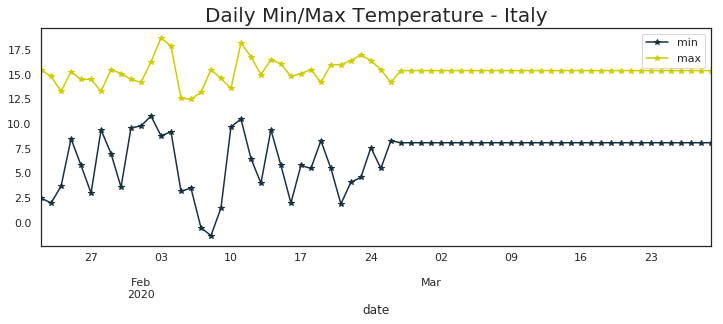

In [44]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')

p=p[p['region']=='China_Hubei']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Hubei',fontdict={'fontsize': 20})

## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='Italy_nan']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Italy',fontdict={'fontsize': 20})
#
#

In [45]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei                6.769118  13.841176
Italy_nan                  6.827941  15.322059
United States_nan          0.000000   0.000000
Spain_nan                  5.869565  14.734783
Iran_nan                   4.972857  14.385714
Germany_nan                1.463768   5.000000
France_nan                 2.566176   8.908824
Korea, South_nan           0.000000   0.000000
Switzerland_nan           -1.497297   1.639189
United Kingdom_nan         0.000000   0.000000
China_Guangdong           14.988235  25.151471
China_Henan                2.857353  10.008824
China_Zhejiang             8.601471  15.191176
Netherlands_nan            0.000000   0.000000
Austria_nan               -2.842029   1.020290
China_Hunan                9.305882  15.461765
Belgium_nan                2.914493   7.362319
China_Anhui                5.644118  12.076471
China_Jiangxi           

##Kalman X Days Ahead Prediction

In [46]:
%%R

#install.packages('reshape')

NULL


In [47]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/korean/ts_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [48]:
all_new=%R all_new

In [49]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

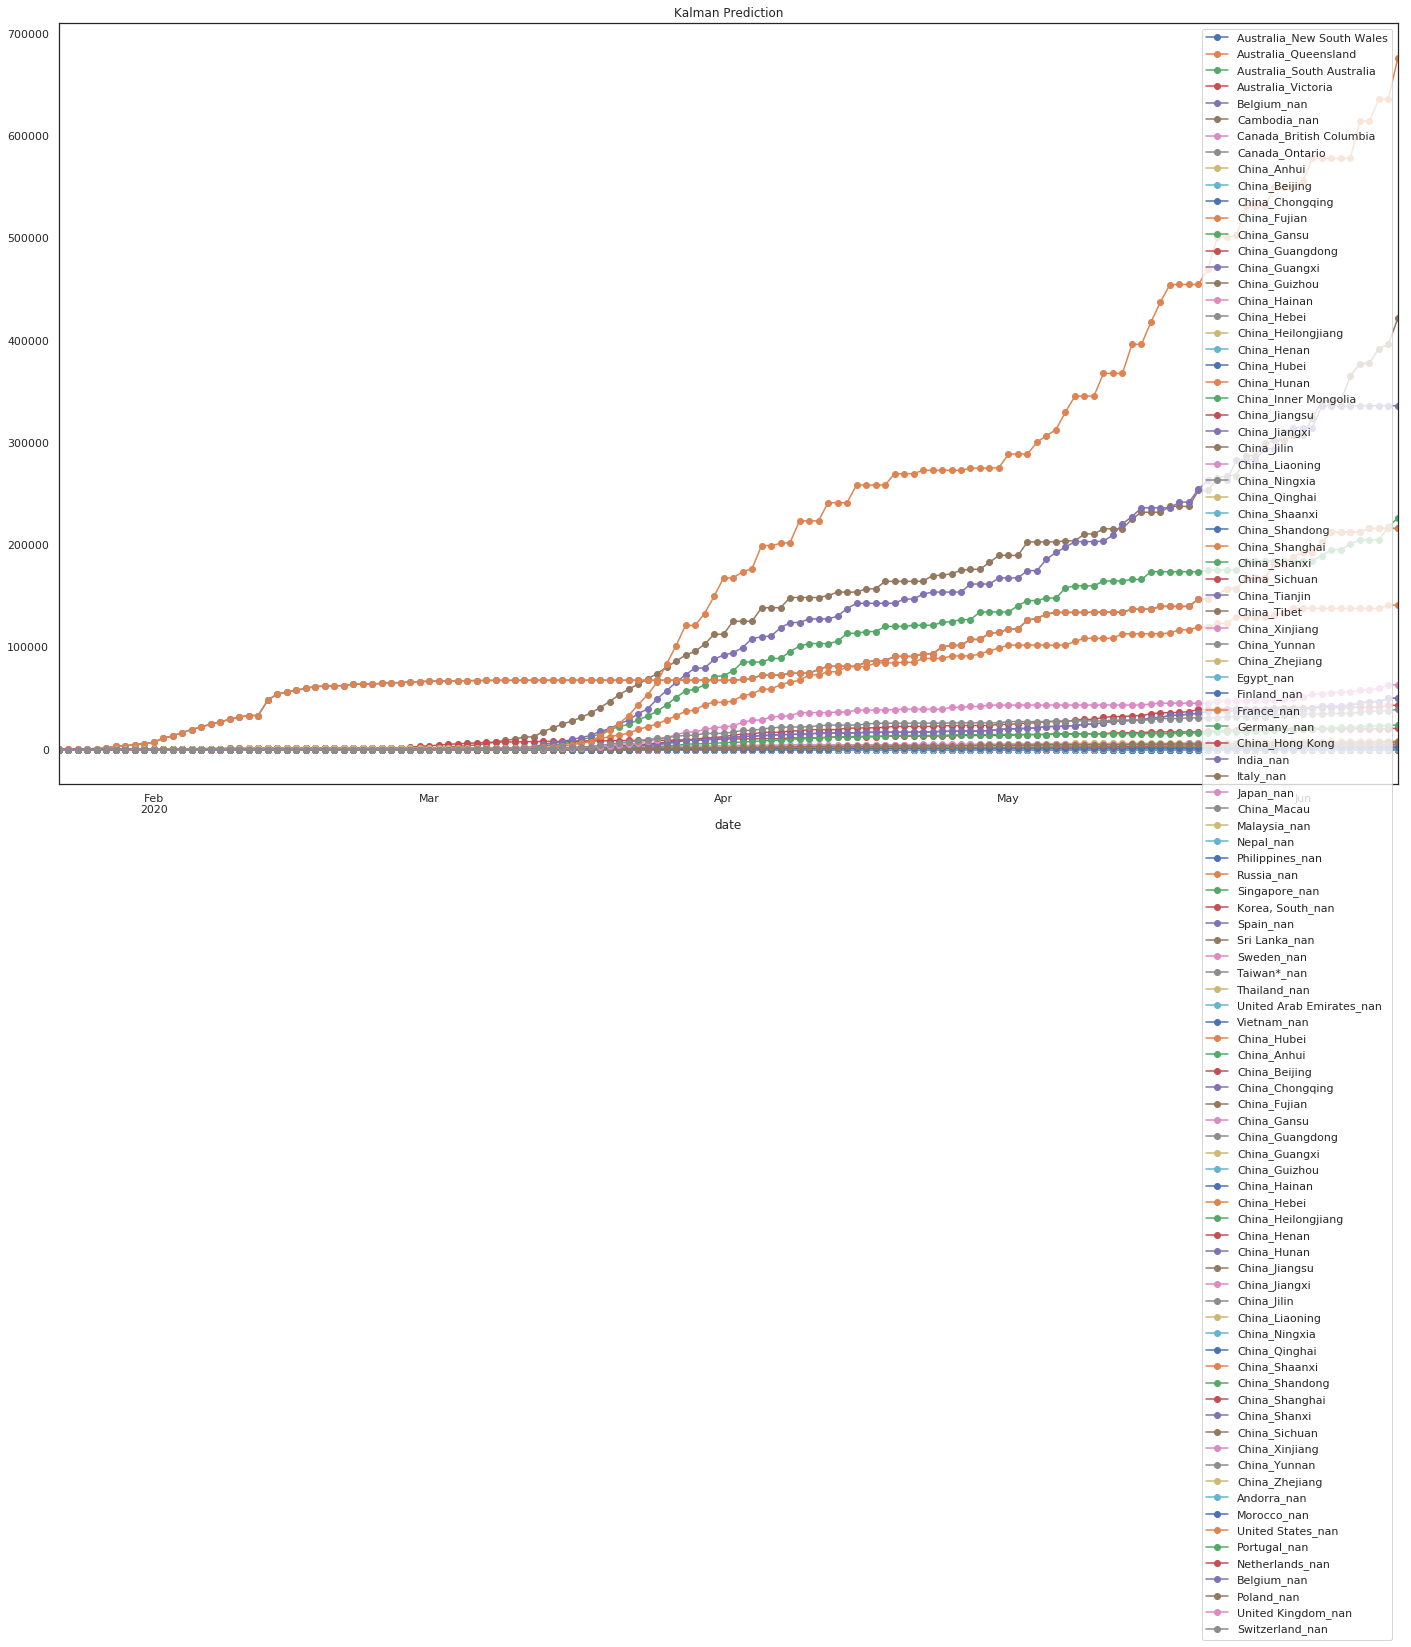

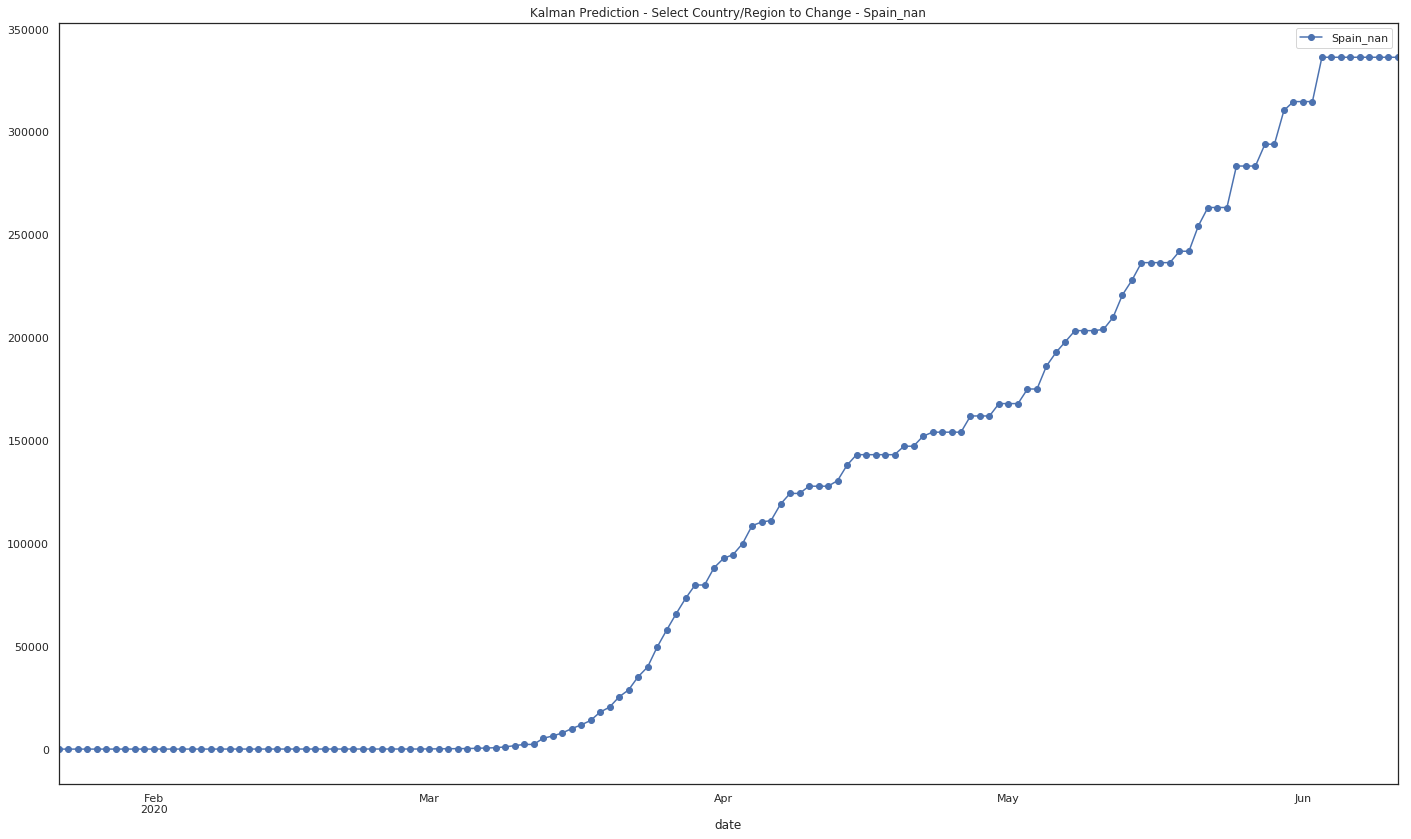

In [59]:

# Select region
region=['date',


        'Australia_New South Wales', 'Australia_Queensland',
        'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
        'Cambodia_nan', 'Canada_British Columbia',
#        'Canada_London ON',
        'Canada_Ontario',
        'China_Anhui', 'China_Beijing',
        'China_Chongqing', 'China_Fujian', 'China_Gansu',
        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
        'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
        'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
        'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
        'China_Yunnan', 'China_Zhejiang', 'Egypt_nan', 'Finland_nan',
        'France_nan', 'Germany_nan',
        'China_Hong Kong',
        'India_nan',
        'Italy_nan', 'Japan_nan', 
        'China_Macau',
        'Malaysia_nan',
        'Nepal_nan', 
#        'Others_Diamond Princess cruise ship',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
        'Korea, South_nan', 'Spain_nan', 'Sri Lanka_nan', 'Sweden_nan',
        'Taiwan*_nan', 'Thailand_nan', 
        'United Arab Emirates_nan',
#       'Unites States_Boston, MA',
#        'Unites States_Chicago, IL', 'Unites States_Los Angeles, CA',
#        'Unites States_Madison, WI', 'Unites States_Orange, CA',
#        'Unites States_San Antonio, TX', 'Unites States_San Benito, CA',
#        'Unites States_San Diego County, CA',
#        'Unites States_Santa Clara, CA', 'Unites States_Seattle, WA',
#        'Unites States_Tempe, AZ',
        'Vietnam_nan',
#       ]
        'China_Hubei',
        'China_Anhui', 'China_Beijing',
        'China_Chongqing', 'China_Fujian', 'China_Gansu',
        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
        'China_Hainan', 'China_Hebei', 'China_Heilongjiang','China_Henan','China_Hunan', 
        'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
        'China_Sichuan',  'China_Xinjiang',
        'China_Yunnan', 'China_Zhejiang', 
 #     'Hong Kong_Hong Kong','Others_Diamond Princess cruise ship'
 ### JOAO - LIST of Countries - Start here
       'Andorra_nan', 'Morocco_nan',
 #       'Italy_nan',
        'United States_nan',
        'Portugal_nan',
 #       'Spain_nan',  
        'Netherlands_nan',
  #      'France_nan', 
        'Belgium_nan', 'Poland_nan',
    #     'India_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
    #    'Germany_nan',
  ### JOAO - LIST of Countries - Finish here       
  #      'Japan_nan'
       ]
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')

#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))


Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Russia_nan')

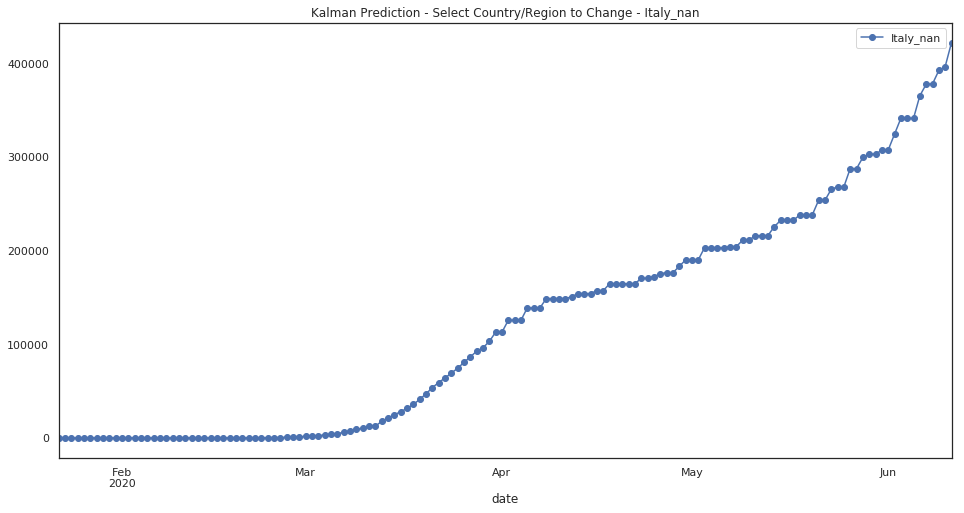

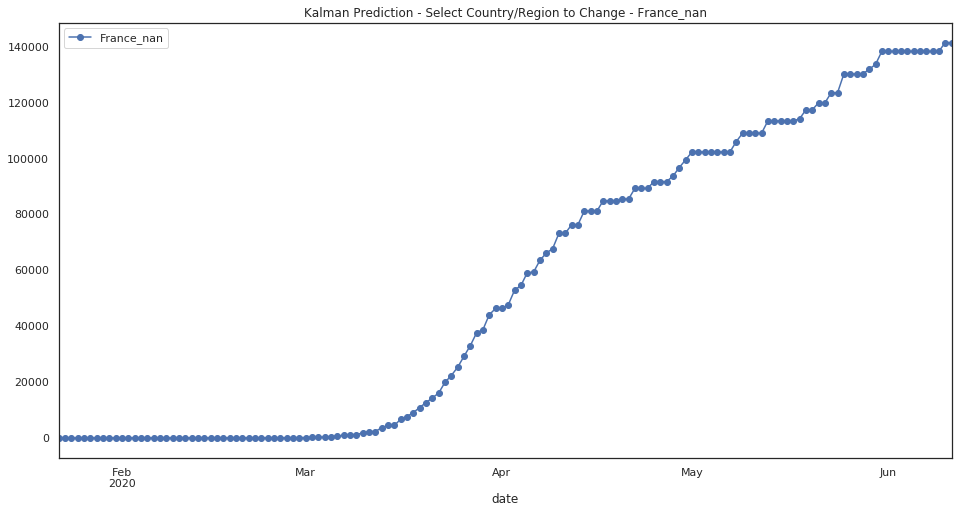

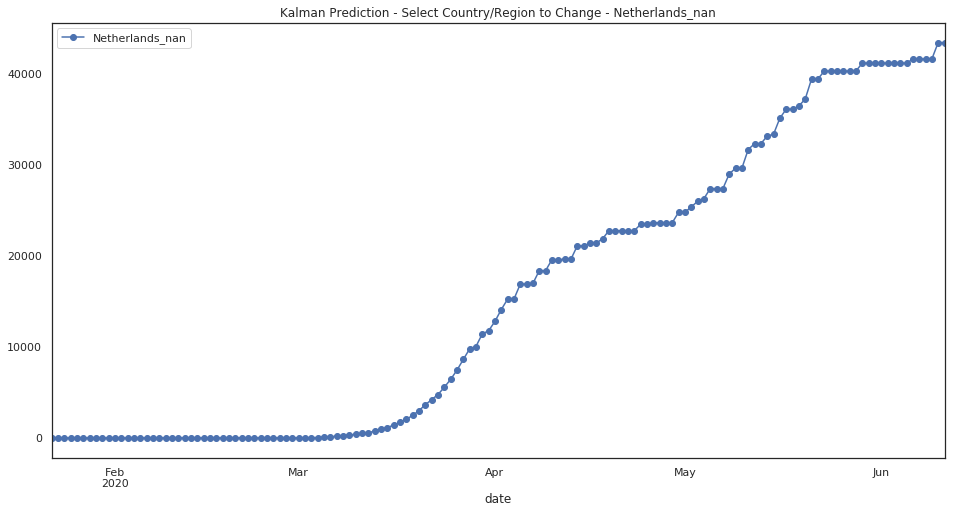

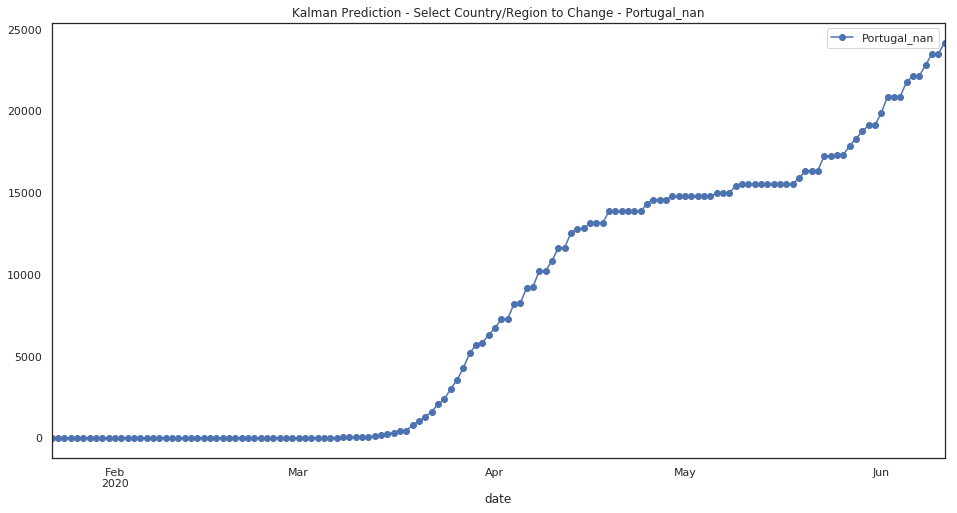

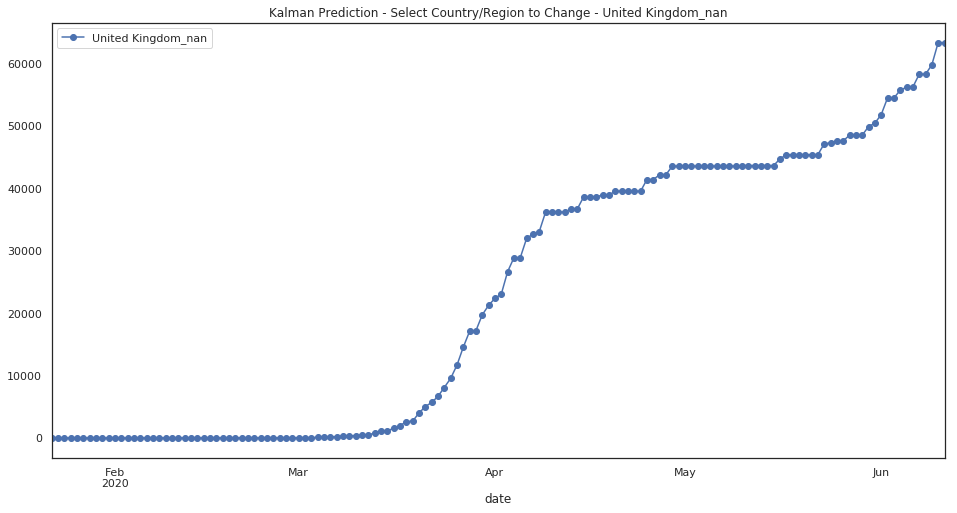

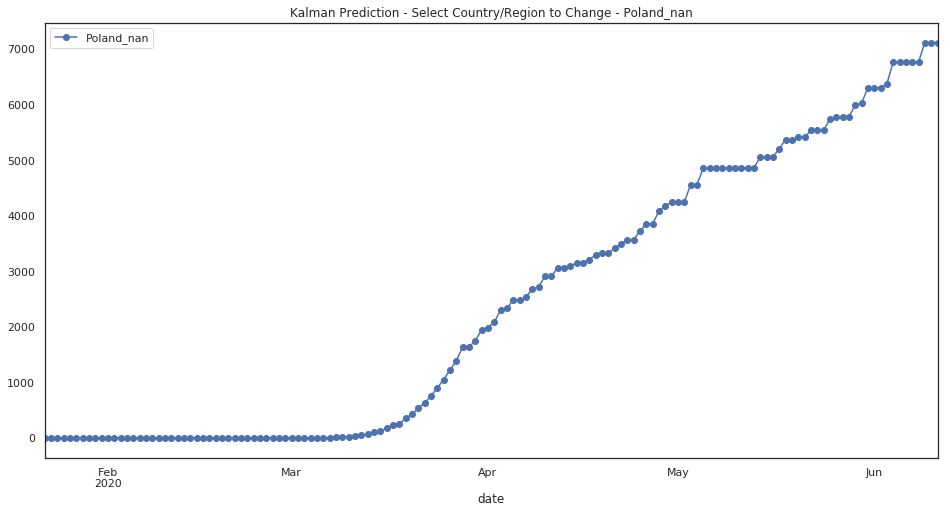

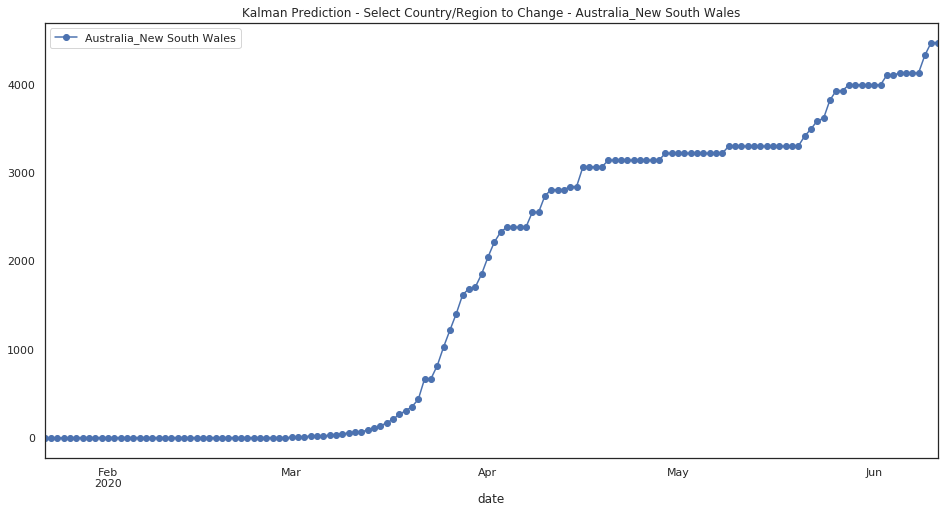

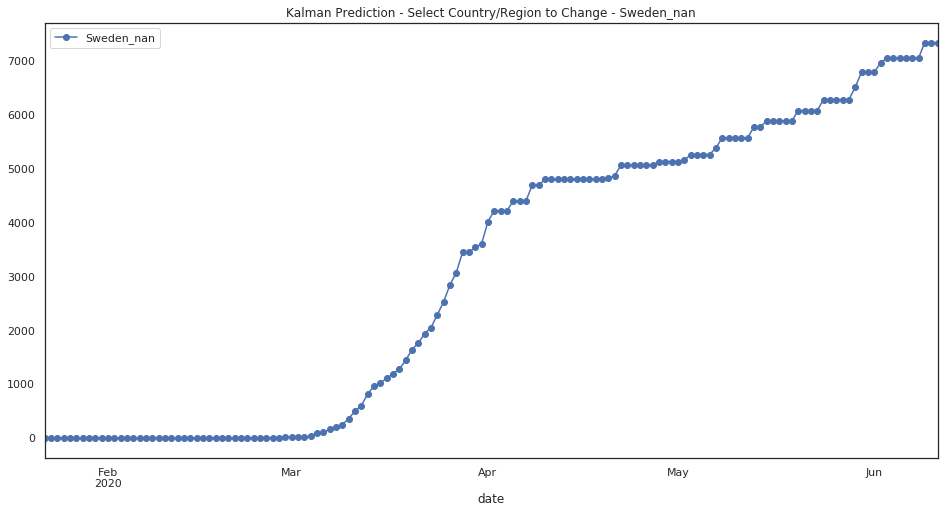

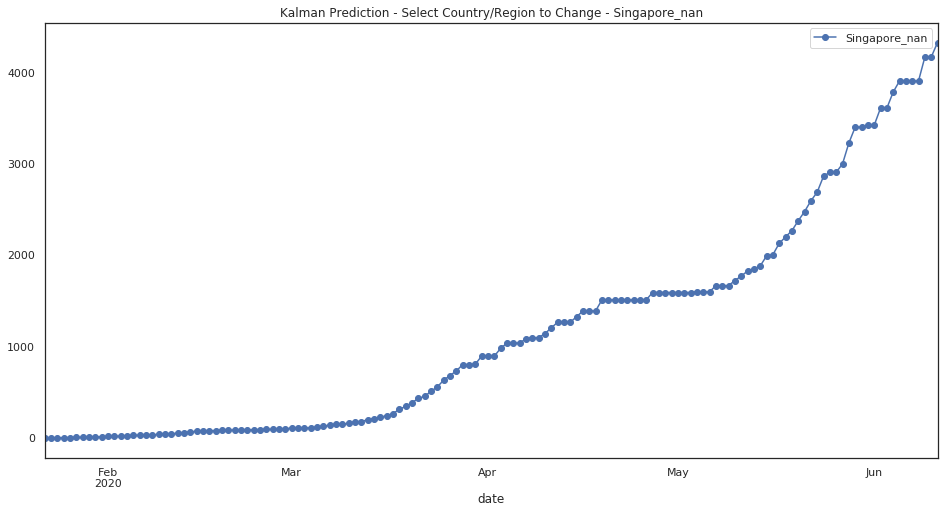

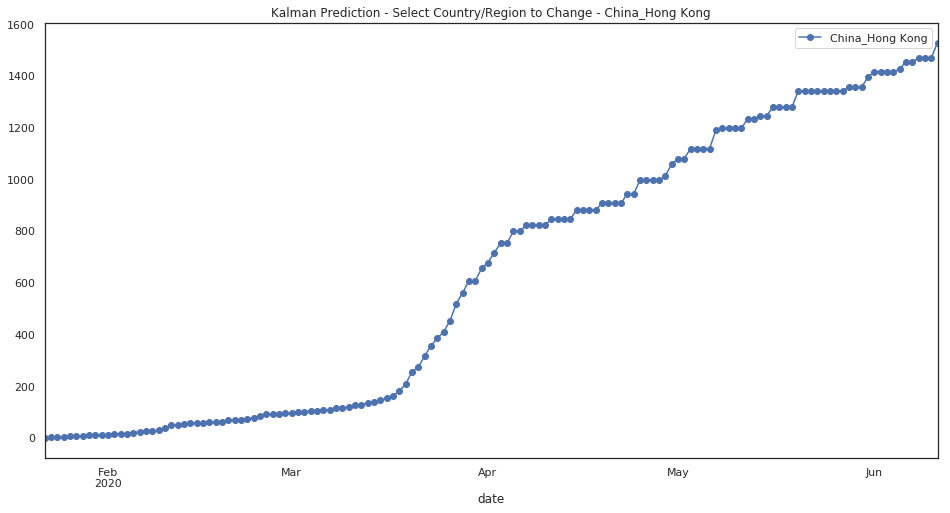

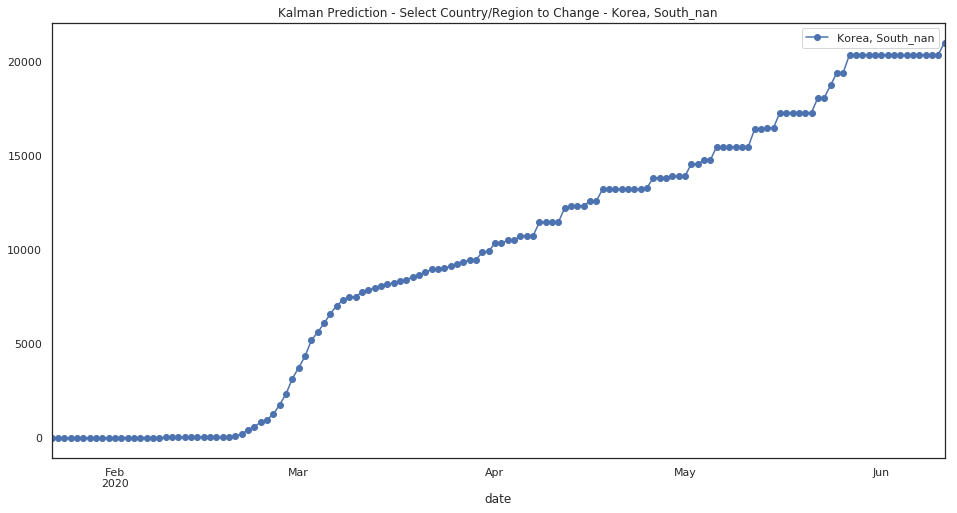

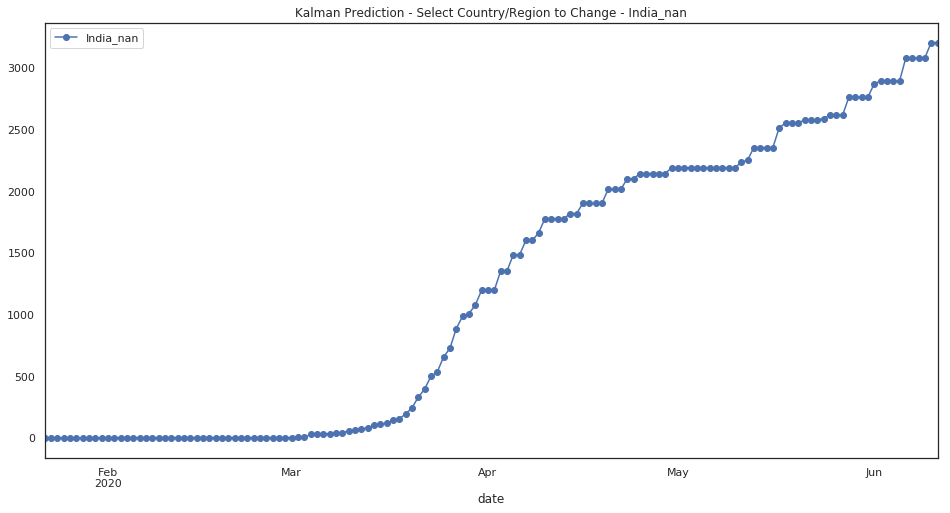

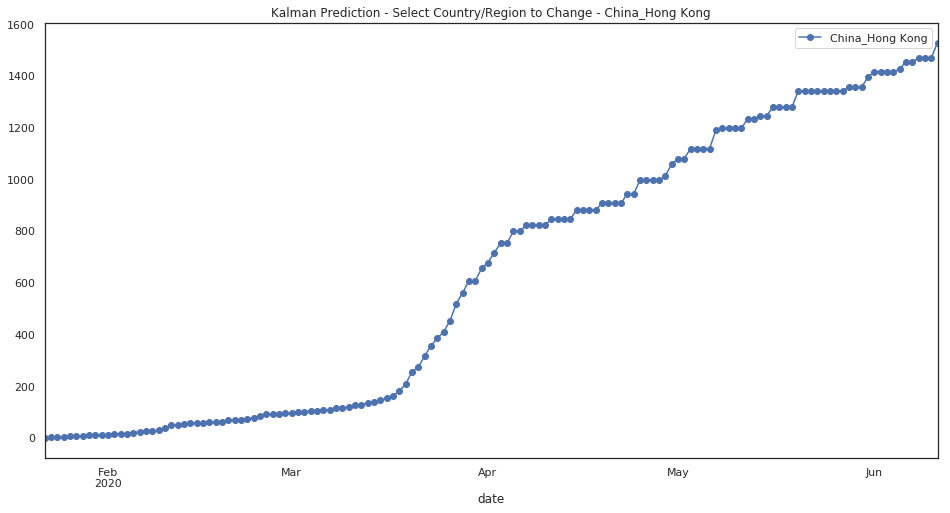

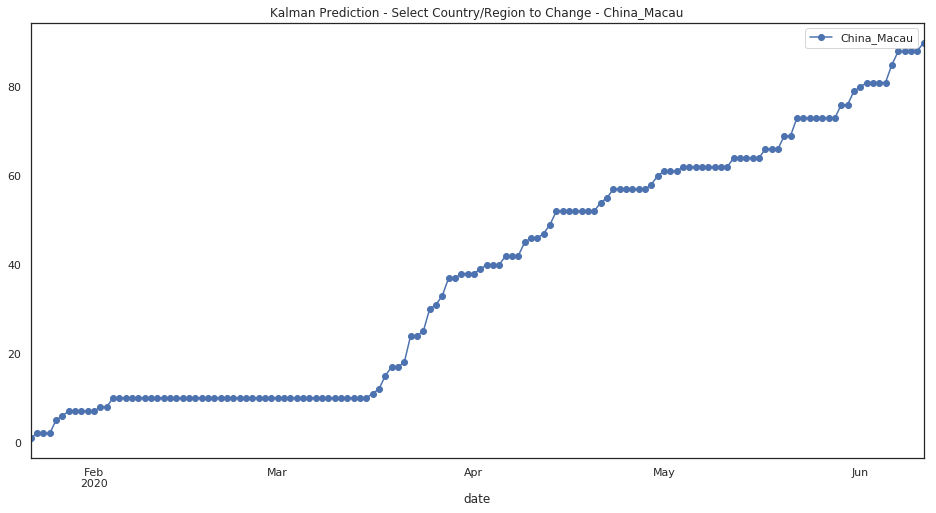

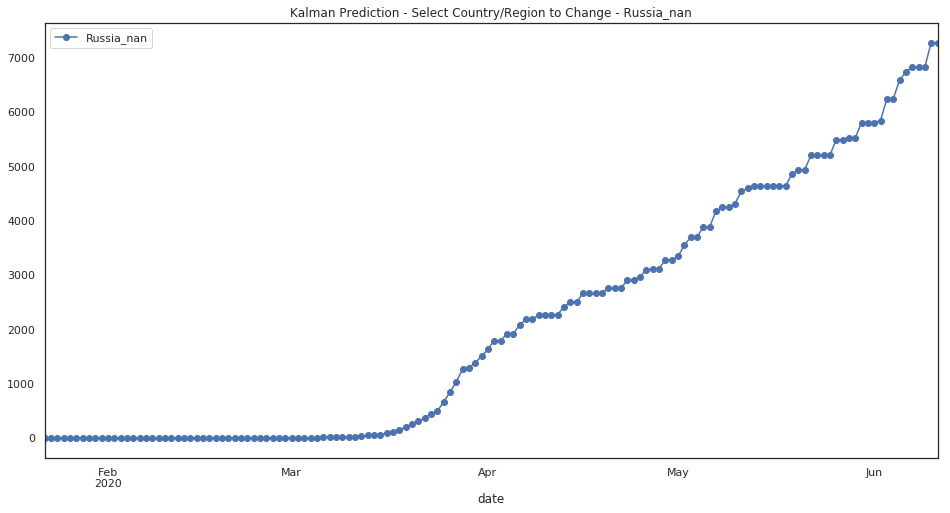

In [61]:
###
p_kalman3=all_new[['date','Italy_nan']]
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))

p_kalman4=all_new[['date','United States_nan']]
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))

p_kalman5=all_new[['date','Germany_nan']]
p_kalman5=p_kalman5.set_index(['date'])
p_kalman5.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman5.columns[0]))

p_kalman6=all_new[['date','France_nan']]
p_kalman6=p_kalman6.set_index(['date'])
p_kalman6.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman6.columns[0]))

p_kalman7=all_new[['date','Netherlands_nan']]
p_kalman7=p_kalman7.set_index(['date'])
p_kalman7.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman7.columns[0]))

p_kalman8=all_new[['date','Portugal_nan']]
p_kalman8=p_kalman8.set_index(['date'])
p_kalman8.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman8.columns[0]))

p_kalman9=all_new[['date','United Kingdom_nan']]
p_kalman9=p_kalman9.set_index(['date'])
p_kalman9.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman9.columns[0]))

p_kalman10=all_new[['date','Poland_nan']]
p_kalman10=p_kalman10.set_index(['date'])
p_kalman10.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman10.columns[0]))

p_kalman11=all_new[['date','Australia_New South Wales']]
p_kalman11=p_kalman11.set_index(['date'])
p_kalman11.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman11.columns[0]))

p_kalman12=all_new[['date','Sweden_nan']]
p_kalman12=p_kalman12.set_index(['date'])
p_kalman12.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman12.columns[0]))

p_kalman13=all_new[['date','Singapore_nan']]
p_kalman13=p_kalman13.set_index(['date'])
p_kalman13.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman13.columns[0]))

p_kalman14=all_new[['date','China_Hong Kong']]
p_kalman14=p_kalman14.set_index(['date'])
p_kalman14.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman14.columns[0]))

p_kalman15=all_new[['date','Taiwan*_nan']]
p_kalman15=p_kalman15.set_index(['date'])
p_kalman15.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman15.columns[0]))
    
p_kalman16=all_new[['date','Korea, South_nan']]
p_kalman16=p_kalman16.set_index(['date'])
p_kalman16.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman16.columns[0]))

p_kalman17=all_new[['date','India_nan']]
p_kalman17=p_kalman17.set_index(['date'])
p_kalman17.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman17.columns[0]))

p_kalman18=all_new[['date','China_Hong Kong']]
p_kalman18=p_kalman18.set_index(['date'])
p_kalman18.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman18.columns[0]))

p_kalman19=all_new[['date','China_Macau']]
p_kalman19=p_kalman19.set_index(['date'])
p_kalman19.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman19.columns[0]))

p_kalman20=all_new[['date','Russia_nan']]
p_kalman20=p_kalman20.set_index(['date'])
p_kalman20.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman20.columns[0]))


Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - China_Hubei')

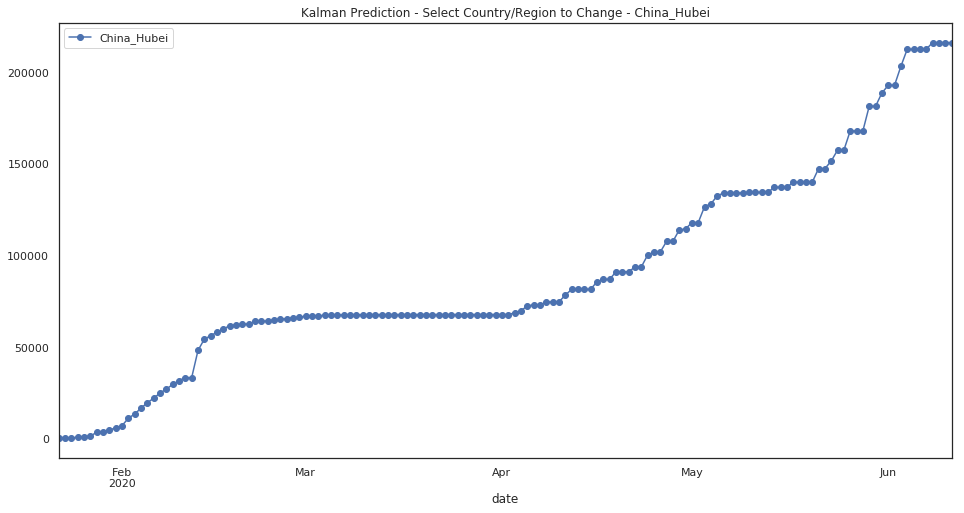

In [62]:
p_kalman_x1=all_new[['date','China_Hubei']] ## Joao
p_kalman_x1=p_kalman_x1.set_index(['date'])
p_kalman_x1.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_x1.columns[0]))


In [63]:
# t.to_csv(r't.csv')


## Iterative Regression

In [64]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
  if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
    t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
  if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
    t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
    t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
    t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
  if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
    t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
    t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
  if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
    t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
    t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
  if(np.isnan(test_iter.iloc[i,13])):
    if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
      test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
      test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [65]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [69]:
test_iter[35580:35610]

date             region  confirmed  1_day_change  3_day_change  \
33192 2020-05-21  United States_nan   454888.0           0.0       17181.0   
33193 2020-05-22  United States_nan   470030.0           0.0         104.0   
33194 2020-05-23  United States_nan   500950.0       15142.0       15142.0   
33195 2020-05-24  United States_nan   500950.0       30920.0       46062.0   
33196 2020-05-25  United States_nan   502819.0           0.0       46062.0   
33197 2020-05-26  United States_nan   531132.0        1869.0       32789.0   
33198 2020-05-27  United States_nan   531132.0       28313.0       30182.0   
33199 2020-05-28  United States_nan   531132.0           0.0       30182.0   
33200 2020-05-29  United States_nan   550158.0           0.0       28313.0   
33201 2020-05-30  United States_nan   550158.0       19026.0       19026.0   
33202 2020-05-31  United States_nan   550158.0           0.0       19026.0   
33203 2020-06-01  United States_nan   555953.0           0.0       19026.0   
33204 2020-06-02  United States_nan   578189.0        5795.0        5795.0   
33205 2020-06-03  United States_nan   578189.0       22236.0       28031.0   
33206 2020-06-04  United States_nan   578189.0           0.0       28031.0   
33207 2020-06-05  United States_nan   578189.0           0.0       22236.0   
33208 2020-06-06  United States_nan   578189.0           0.0           0.0   
33209 2020-06-07  United States_nan   614671.0           0.0           0.0   
33210 2020-06-08  United States_nan   614671.0       36482.0       36482.0   
33211 2020-06-09  United States_nan   636417.0           0.0       36482.0   
33212 2020-06-10  United States_nan   636417.0       21746.0       58228.0   
33213 2020-06-11  United States_nan   676502.0           0.0       21746.0   
33214 2020-06-12  United States_nan        0.0       40085.0       61831.0   
33215 2020-01-22        Uruguay_nan        0.0           0.0           0.0   
33216 2020-01-23        Uruguay_nan        0.0           0.0           0.0   
33217 2020-01-24        Uruguay_nan        0.0           0.0           0.0   
33218 2020-01-25        Uruguay_nan        0.0           0.0           0.0   
33219 2020-01-26        Uruguay_nan        0.0           0.0           0.0   
33220 2020-01-27        Uruguay_nan        0.0           0.0           0.0   
33221 2020-01-28        Uruguay_nan        0.0           0.0           0.0   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
33192       86945.0         100.000220         103.925457         123.630291   
33193       58580.0         100.000220         100.023088         114.781685   
33194       73722.0         103.328951         103.328951         118.602451   
33195       82918.0         106.578516         110.126229         119.835563   
33196       63243.0         100.000200         110.126229         114.448935   
33197       48035.0         100.373291         106.976150         110.562377   
33198       76244.0         105.631052         106.025152         116.761269   
33199       76244.0         100.000188         106.025152         116.761269   
33200       76244.0         100.000188         105.631052         116.761269   
33201       80128.0         103.582349         103.582349         117.047635   
33202       49208.0         100.000182         103.582349         109.823136   
33203       49208.0         100.000182         103.582349         109.823136   
33204       53134.0         101.053516         101.053516         110.567421   
33205       47057.0         103.999799         105.095264         108.859944   
33206       47057.0         100.000173         105.095264         108.859944   
33207       47057.0         100.000173         103.999799         108.859944   
33208       28031.0         100.000173         100.000173         105.095264   
33209       28031.0         100.000173         100.000173         105.095264   
33210       64513.0         106.309874         106.309874         111.726

In [70]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
      if(pred.iloc[i,0]<pred.iloc[i-1,1]):
        pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [80]:
region=[
  #     'China_Anhui', 'China_Beijing',
  #     'China_Chongqing', 'China_Fujian', 'China_Gansu',
  #     'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
  #     'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan','China_Hunan', 
  #     'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
  #     'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
  #     'China_Shandong', 'China_Shanghai', 'China_Shanxi',
  #     'China_Sichuan',  'China_Xinjiang',
  #     'China_Yunnan', 'China_Zhejiang', 
  #      'Hong Kong_Hong Kong','Japan_nan','Others_Diamond Princess cruise ship'
  #  
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
   #     'United States_nan',
        'Portugal_nan', 'Spain_nan',  
   #     'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 'Switzerland_nan', 'Germany_nan',
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
      #  'Singapore_nan','China_Hong Kong',
      #  'Taiwan*_nan',
        #'Korea, South_nan',
       # 'China_Macau',
       # 'India_nan',
  ### JOAO - LIST of Countries - Finish here     
       ]

# region=['China_Anhui', 'China_Beijing',
#        'China_Chongqing', 'China_Fujian', 'China_Gansu',
#        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
#        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
#        'China_Jiangsu', 'China_Jiangxi', 'China_Liaoning',
#        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
#        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      
#        'China_Yunnan', 'China_Zhejiang' 
#      ]

### Joao - ERROR - KeyError: "None of [Index(['Portugal_nan', 'Andorra_nan', 'Spain_nan', 'Belgium_nan',\n       'Morocco_nan', 'Netherlands_Netherlands', 'France_France', 'Poland_nan',\n       'United Kingdom_United Kingdom', 'Switzerland_nan', 'Germany_nan',\n       'Italy_nan'],\n      dtype='object')] are in the [columns]"     

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

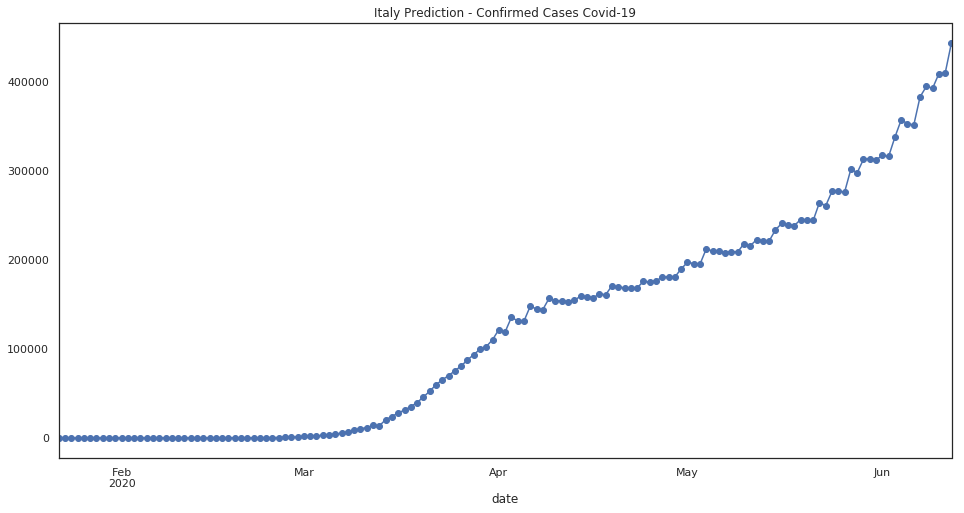

In [81]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

In [82]:
p3=pred['Spain_nan']
p3.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

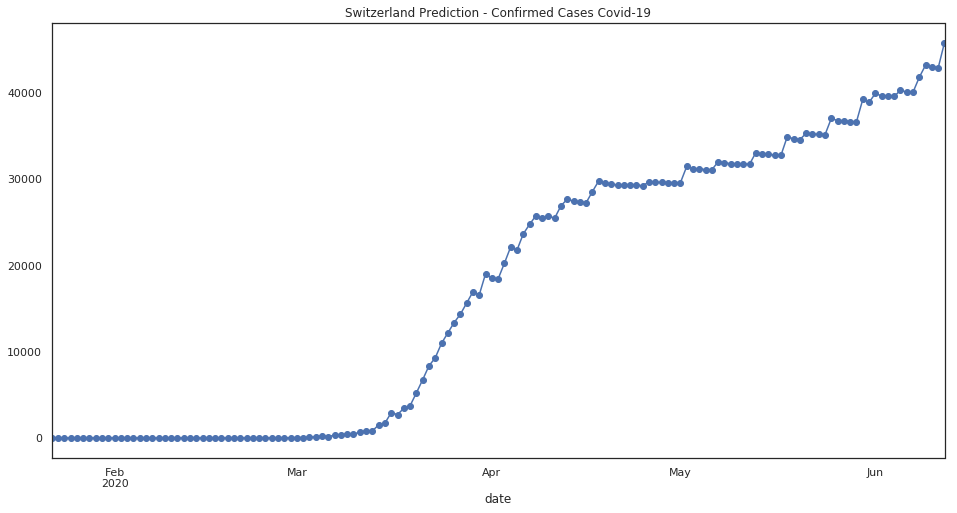

In [83]:
p4=pred['Switzerland_nan']
p4.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

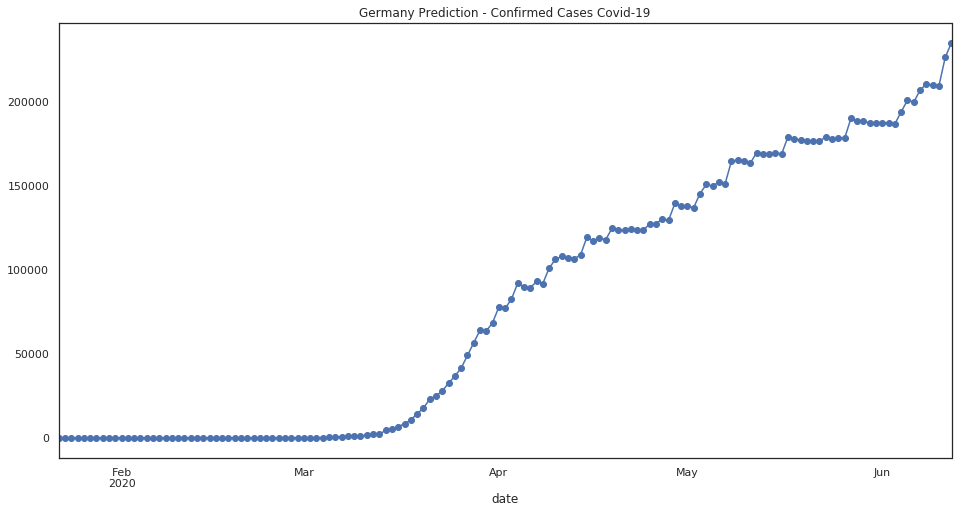

In [84]:
p5=pred['Germany_nan']
p5.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

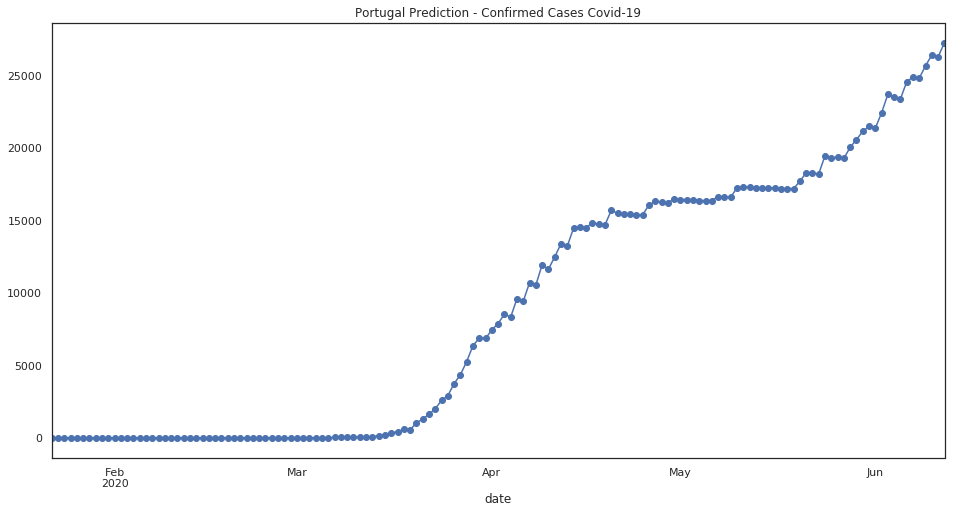

In [85]:
p6=pred['Portugal_nan']
p6.plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

In [86]:
p8=pred['United Kingdom_nan']
p8.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

In [87]:
p9=pred['France_nan']
p9.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

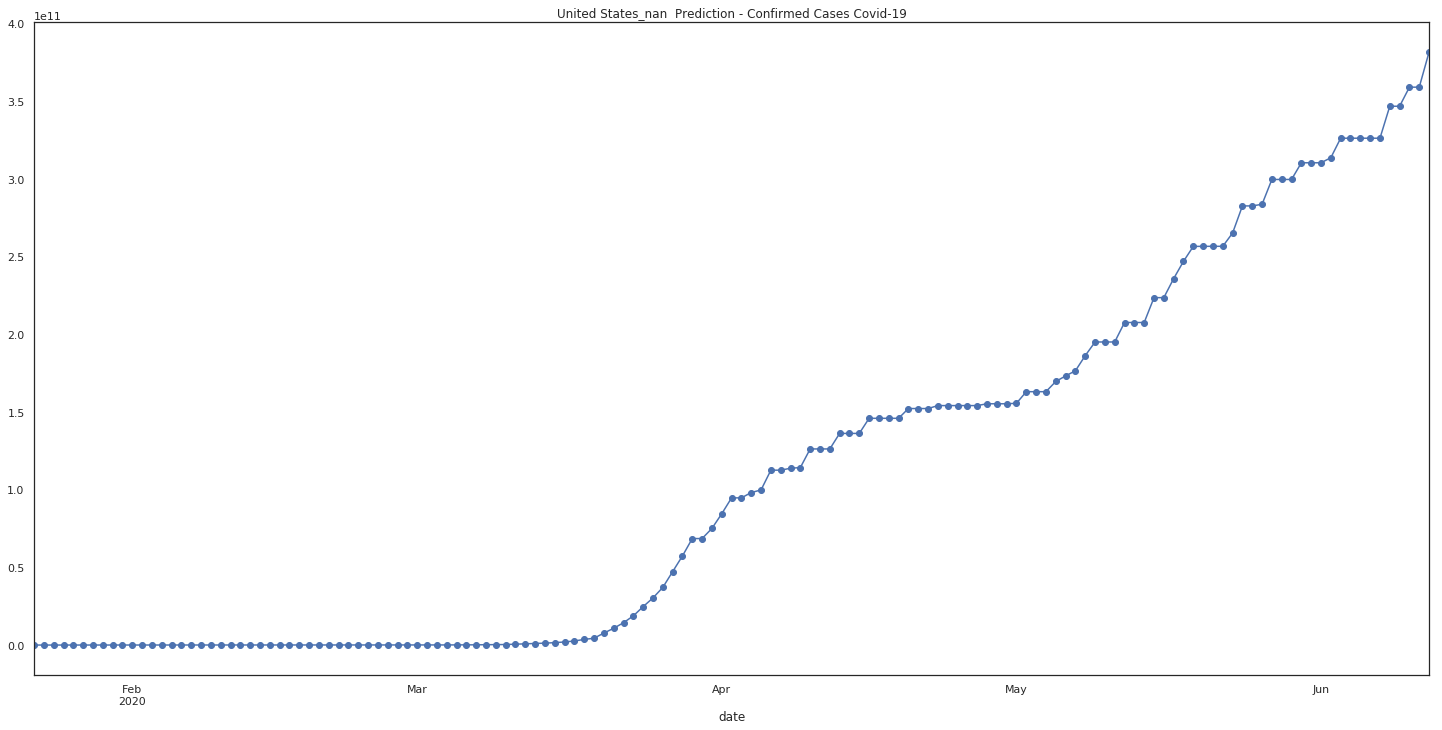

In [88]:
p10=pred['United States_nan']
p10.plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

In [89]:
p11=pred['China_Hubei']
p11.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

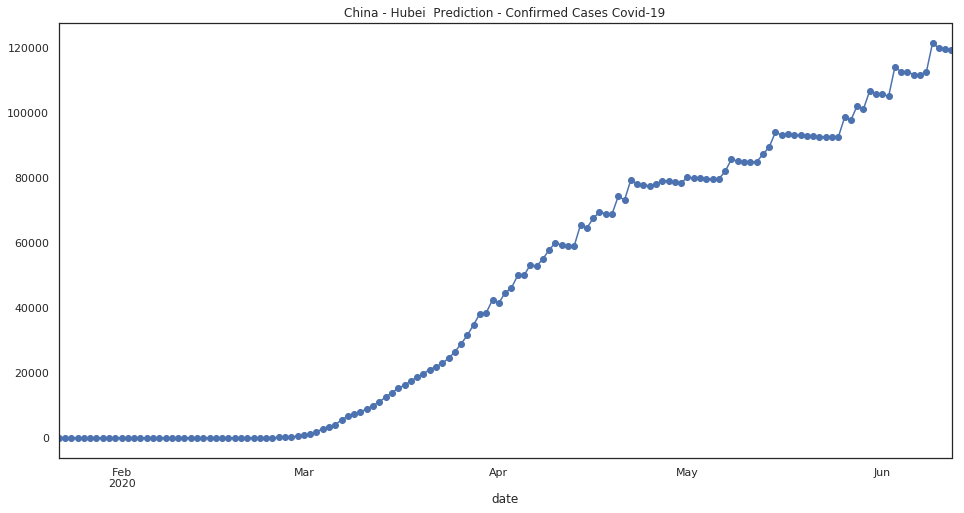

In [90]:
p12=pred['Iran_nan']
p12.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

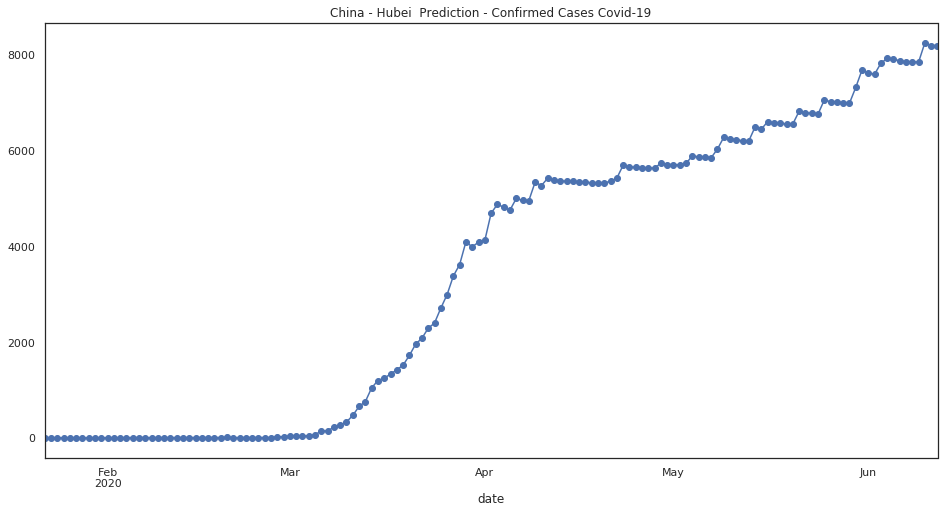

In [91]:
p13=pred['Sweden_nan']
p13.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

In [92]:
p13=pred['Russia_nan']
p13.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

In [93]:
pv1=p #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [94]:
p[:]

region      China_Hubei  Italy_nan  Portugal_nan  Spain_nan  France_nan  \
date                                                                      
2020-01-22          4.0        9.0           6.0        6.0         9.0   
2020-01-23        444.0        9.0           6.0        5.0         7.0   
2020-01-24        455.0        7.0           3.0        3.0        11.0   
2020-01-25        581.0        6.0           4.0        4.0        11.0   
2020-01-26        845.0        7.0           7.0        7.0        10.0   
2020-01-27       1190.0        8.0           6.0        6.0         6.0   
2020-01-28       1599.0        4.0           5.0        5.0         9.0   
2020-01-29       4268.0        7.0           4.0        4.0        12.0   
2020-01-30       4060.0        9.0           4.0        4.0        15.0   
2020-01-31       5872.0        5.0           6.0        6.0        11.0   
2020-02-01       6655.0        7.0           7.0        7.0        13.0   
2020-02-02       8305.0        7.0           4.0        5.0        14.0   
2020-02-03      13401.0       10.0           8.0        9.0        14.0   
2020-02-04      15720.0       11.0          10.0       11.0        17.0   
2020-02-05      19299.0       11.0           8.0       11.0        15.0   
2020-02-06      22432.0       11.0           6.0        9.0        15.0   
2020-02-07      24905.0       13.0           7.0       10.0        20.0   
2020-02-08      27989.0       18.0           6.0        9.0        17.0   
2020-02-09      30028.0       16.0           4.0        9.0        21.0   
2020-02-10      32576.0       11.0           8.0       16.0        19.0   
2020-02-11      34543.0       13.0           6.0       13.0        20.0   
2020-02-12      35973.0       14.0           3.0       10.0        22.0   
2020-02-13      35239.0       14.0           5.0       11.0        22.0   
2020-02-14      55121.0       12.0           8.0       14.0        19.0   
2020-02-15      60362.0       13.0           8.0       14.0        23.0   
2020-02-16      61518.0       15.0           9.0       14.0        21.0   
2020-02-17      62429.0       13.0           7.0       12.0        19.0   
2020-02-18      63868.0       13.0           8.0       13.0        20.0   
2020-02-19      65559.0       11.0           9.0       14.0        20.0   
2020-02-20      65555.0       13.0          11.0       15.0        23.0   
...                 ...        ...           ...        ...         ...   
2020-05-14     136827.0   220838.0       17244.0   231214.0    116900.0   
2020-05-15     140654.0   233320.0       17244.0   238385.0    116049.0   
2020-05-16     140110.0   240610.0       17244.0   247842.0    115782.0   
2020-05-17     140110.0   238825.0       17212.0   245306.0    115214.0   
2020-05-18     143617.0   238063.0       17205.0   244737.0    115214.0   
2020-05-19     143083.0   244912.0       17205.0   244011.0    116251.0   
2020-05-20     143083.0   243810.0       17713.0   251180.0    120446.0   
2020-05-21     142863.0   243810.0       18304.0   249313.0    119511.0   
2020-05-22     152790.0   263968.0       18262.0   265803.0    122851.0   
2020-05-23     151350.0   260457.0       18228.0   274411.0    122111.0   
2020-05-24     156969.0   276625.0       19482.0   272701.0    127017.0   
2020-05-25     163490.0   276697.0       19308.0   271706.0    126118.0   
2020-05-26     162337.0   275772.0       19405.0   298570.0    135192.0   
2020-05-27     176269.0   301372.0       19296.0   294266.0    133373.0   
2020-05-28     173766.0   297383.0       20059.0   294266.0    133373.0   
2020-05-29     173231.0   312455.0       20590.0   306265.0    132655.0   
2020-05-30     190742.0   313243.0       21153.0   303575.0    135001.0   
2020-05-31     187837.0   311727.0       21494.0   326016.0    136711.0   
2020-06-01     197302.0   316721.0       21387.0   327880.0    142709.0   
2020-06-02     200581.0   315575.0       22436.0   325595.0    141186.0   
2020-06-03     199009.0  

In [95]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [96]:
p.to_csv('/home/notebookuser/notebooks/covid19/p_confirmed_daily.csv', index = True)

In [97]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [98]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [99]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=60+(145-113)
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 


In [101]:
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
# Generate the heatmap into an HTML file
gmap.draw("Heatmap4-2020-02-29.html")

In [102]:
exit()

H2O session _sid_adc8 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
